In [295]:
import pandas as pd
import seaborn as sns
import numpy as np

In [296]:
df=pd.read_csv('train1.csv')

In [297]:
df.dropna(axis=0, how='any', inplace=True)


In [298]:
df.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [299]:
df['Total_Stops'] = df['Total_Stops'].replace(['non-stop','1 stop', '2 stops', '3 stops', '4 stops'], [0, 1, 2, 3, 4])

In [300]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  int64 
 8   Price            10682 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 834.5+ KB


<IPython.core.display.Javascript object>

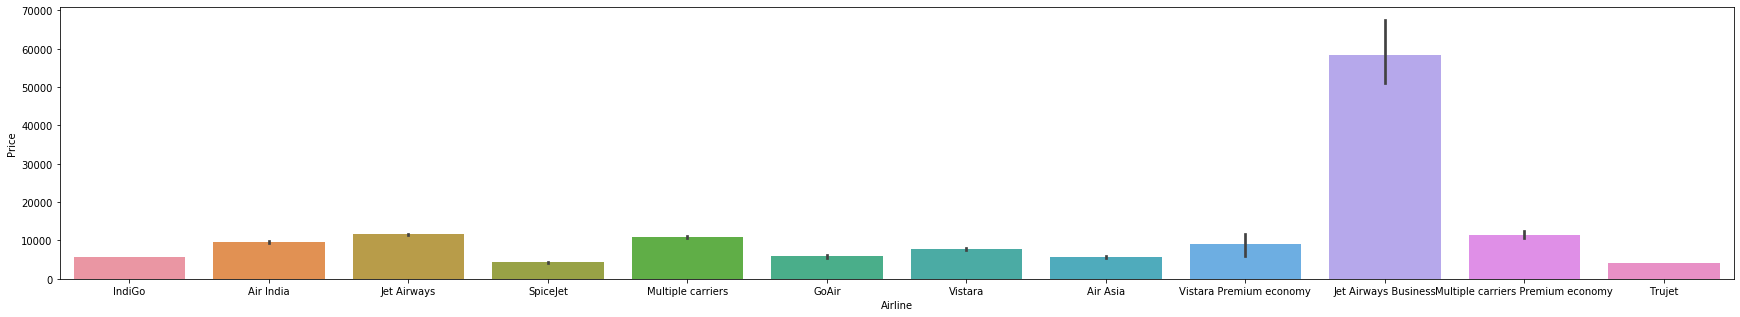

In [302]:
plt.figure(figsize=(30,5))
sns.barplot(x="Airline",y="Price",data=df)

In [303]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [304]:
y=df["Price"]

In [305]:
df.drop(['Price'],axis=1,inplace=True)
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [306]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1


In [307]:
air_line=pd.get_dummies(df['Airline'],drop_first=True)
air_line

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [308]:

dst=pd.get_dummies(df['Destination'],drop_first=True)


In [309]:
src=pd.get_dummies(df['Source'],drop_first=True)

In [310]:
df1=pd.concat([air_line,src,dst],axis=1)
df1

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [311]:
df.rename(columns = {'Kolkata':'Kolkata_dest', 'Delhi':'Delhi_dest'}, inplace = True)

In [312]:
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)


In [313]:
df=pd.concat([df1,df],axis=1)

In [314]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,24/03/2019,22:20,01:10 22 Mar,2h 50m,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1/05/2019,05:50,13:15,7h 25m,2
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,9/06/2019,09:25,04:25 10 Jun,19h,2
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,12/05/2019,18:05,23:30,5h 25m,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,01/03/2019,16:50,21:35,4h 45m,1


In [315]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [316]:
df['Day'] = df['Date_of_Journey'].dt.day
df['Day_Of_week'] = df['Date_of_Journey'].dt.dayofweek
df['month']=df['Date_of_Journey'].dt.month

In [317]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [318]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['dep_Hour'] = df['Dep_Time'].dt.hour 
df['dep_minute'] = df['Dep_Time'].dt.minute
df['Arr_Hour'] = df['Arrival_Time'].dt.hour 
df['Arr_minute'] = df['Arrival_Time'].dt.minute

In [319]:
duration = list(df['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
dur_hours = []
dur_minutes = []  
 
for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
     
 
df['Duration_hours'] = dur_hours
df['Duration_minutes'] =dur_minutes

df.loc[:,'Duration_hours'] *= 60
df['Duration_Total_mins']= df['Duration_hours']+df['Duration_minutes']

In [320]:
df.drop(['Arrival_Time','Duration','Duration_hours','Duration_minutes'],axis=1,inplace=True)

In [321]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [322]:
X=df[:]



In [323]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,New Delhi,Total_Stops,Day,Day_Of_week,month,dep_Hour,dep_minute,Arr_Hour,Arr_minute,Duration_Total_mins
0,0,0,1,0,0,0,0,0,0,0,...,1,0,24,6,3,22,20,1,10,170
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,5,1,5,50,13,15,445
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,4,9,9,25,4,25,1140
3,0,0,1,0,0,0,0,0,0,0,...,0,1,5,3,12,18,5,23,30,325
4,0,0,1,0,0,0,0,0,0,0,...,1,1,3,3,1,16,50,21,35,285


In [324]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Total_Stops', 'Day', 'Day_Of_week', 'month', 'dep_Hour',
       'dep_minute', 'Arr_Hour', 'Arr_minute', 'Duration_Total_mins'],
      dtype='object')

In [325]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [149]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [150]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

RANDOM FOREST

In [326]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1800,min_samples_split=10,min_samples_leaf=1,max_features='sqrt',max_depth=30,bootstrap=False,random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=1800, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [327]:
y_pred=model.predict(X_test)

In [328]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2_sco=r2_score(y_test,y_pred)

In [329]:
r2_sco

0.8098293078481414

In [330]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: %f" % (rmse))

RMSE: 2026.272137


WORKING ON TEST SET


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_excel('Test_set.xlsx')
y=pd.read_excel('Sample_submission.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
df.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [6]:
df['Total_Stops'] = df['Total_Stops'].replace(['non-stop','1 stop', '2 stops', '3 stops', '4 stops'], [0, 1, 2, 3, 4])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Dep_Time         2671 non-null   object
 5   Arrival_Time     2671 non-null   object
 6   Duration         2671 non-null   object
 7   Total_Stops      2671 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 167.1+ KB


In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,0


In [9]:
air_line=pd.get_dummies(df['Airline'],drop_first=True)
air_line

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0


In [10]:

dst=pd.get_dummies(df['Destination'],drop_first=True)
src=pd.get_dummies(df['Source'],drop_first=True)

In [11]:
df1=pd.concat([air_line,src,dst],axis=1)
df1

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [12]:
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)
df=pd.concat([df1,df],axis=1)

In [13]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [14]:
df['Day'] = df['Date_of_Journey'].dt.day
df['Day_of_Week'] = df['Date_of_Journey'].dt.dayofweek
df['Month']=df['Date_of_Journey'].dt.month

In [15]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)


df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['dep_Hour'] = df['Dep_Time'].dt.hour 
df['dep_minute'] = df['Dep_Time'].dt.minute
df['Arr_Hour'] = df['Arrival_Time'].dt.hour 
df['Arr_minute'] = df['Arrival_Time'].dt.minute

In [16]:
df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [17]:
duration = list(df['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
dur_hours = []
dur_minutes = []  
 
for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
     
 
df['Duration_hours'] = dur_hours
df['Duration_minutes'] =dur_minutes

df.loc[:,'Duration_hours'] *= 60
df['Duration_Total_mins']= df['Duration_hours']+df['Duration_minutes']

In [18]:
df.drop(['Duration','Duration_hours','Duration_minutes'],axis=1,inplace=True)

In [19]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,New Delhi,Total_Stops,Day,Day_of_Week,Month,dep_Hour,dep_minute,Arr_Hour,Arr_minute,Duration_Total_mins
0,0,0,0,1,0,0,0,0,0,0,...,0,1,6,3,6,17,30,4,25,655
1,0,0,1,0,0,0,0,0,0,0,...,0,1,5,3,12,6,20,10,20,240
2,0,0,0,1,0,0,0,0,0,0,...,0,1,21,1,5,19,15,19,0,1425
3,0,0,0,0,0,1,0,0,0,0,...,0,1,21,1,5,8,0,21,0,780
4,0,0,0,0,0,0,0,0,0,0,...,0,0,24,0,6,23,55,2,45,170
